In [108]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [99]:
# Load and further clean data
data = pd.read_csv("data/Algerian_forest_fires_dataset_CLEANED.csv")
# Drop the first messy column
data = data.drop(['Unnamed: 0'], axis=1)

In [100]:
data.iloc[:, 3:-2].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


In [110]:
def preprocess_data(data):
    y = data['Classes'].values
    X = data.drop(['Classes', 'year', 'DC', 'BUI'], axis=1)

    X['Region'].loc[X['Region'] == 'Bejaia'] = 0
    X['Region'].loc[X['Region'] == 'Sidi-Bel Abbes'] = 1
    
    y[y == "notfire"] = 0
    y[y == "fire"] = 1
    y = y.astype(int)
    
    return X, y

def normalize(data):
    

In [112]:
X, y = preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [104]:
predictions = clf.predict(X_test)
print(confusion_matrix(predictions, y_test))
tn, fp, fn, tp = confusion_matrix(predictions, y_test).ravel()
n = len(y_test)

[[22  1]
 [ 0 26]]


In [105]:
print('Accuracy: ' + str((tp+tn)/n))
print('Precision: ' + str(tp/(tp+fp)))
print('Recall: ' + str(tp/(tp+fn)))

Accuracy: 0.9795918367346939
Precision: 0.9629629629629629
Recall: 1.0


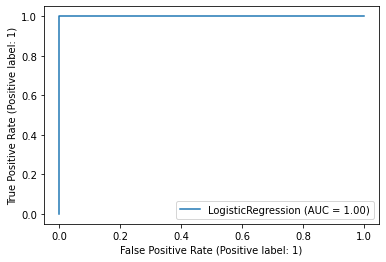

In [107]:
plot_roc_curve(clf, X_test, y_test);